In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

**Clustering for dataset exploration**

In [2]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
iris=load_iris()
samples=iris.data
model=KMeans(n_clusters=3)
model.fit(samples)
labels=model.predict(samples)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


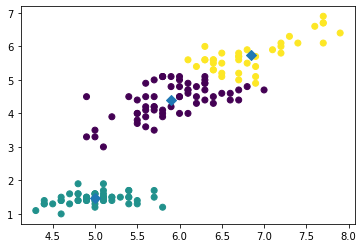

In [4]:
# plotting sepal length and petal length
xs=samples[:,0]
ys=samples[:,2]
plt.scatter(xs,ys,c=labels)
centroids=model.cluster_centers_
centroids_x=centroids[:,0]
centroids_y=centroids[:,2]
plt.scatter(centroids_x,centroids_y,marker='D',s=50)
plt.show()

In [5]:
seeds=pd.read_csv('/content/drive/MyDrive/D3.js Visualization/Seed_Data.csv')
seeds.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [6]:
seed_dict={
    0:'Kama',
    1:'Rosa',
    2:'Canadian'
}
seed_list=seeds['target'].map(seed_dict).tolist()

In [7]:

seeds=seeds.drop(['target'],axis=1)
seeds.head()

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


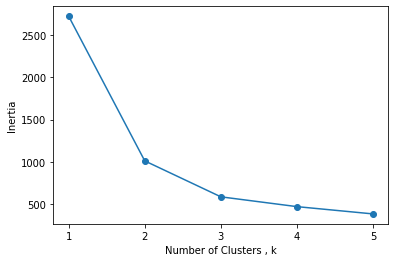

In [8]:
ks=range(1,6)
inertias=[]

for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(seeds)
    inertias.append(model.inertia_)

plt.plot(ks,inertias,'-o')
plt.xlabel('Number of Clusters , k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In [9]:
seeds.head()

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [10]:
model=KMeans(n_clusters=3)
seed_labels=model.fit_predict(seeds)
centroids=model.cluster_centers_
centroids



array([[14.64847222, 14.46041667,  0.87916667,  5.56377778,  3.27790278,
         2.64893333,  5.19231944],
       [18.72180328, 16.29737705,  0.88508689,  6.20893443,  3.72267213,
         3.60359016,  6.06609836],
       [11.96441558, 13.27480519,  0.8522    ,  5.22928571,  2.87292208,
         4.75974026,  5.08851948]])

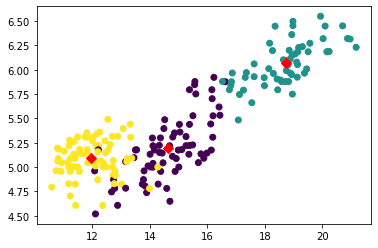

In [11]:
# A vs LKG
xs_A=seeds.iloc[:,0]
ys_LKG=seeds.iloc[:,-1]
centroids_xs_A=centroids[:,0]
centroids_ys_LKG=centroids[:,-1]
plt.scatter(xs_A,ys_LKG,c=seed_labels)
plt.scatter(centroids_xs_A,centroids_ys_LKG,marker='D',s=50,c='red')
plt.show()

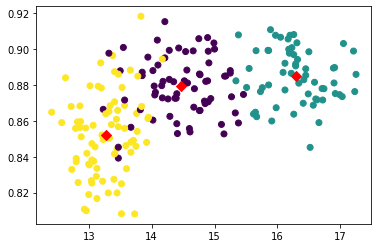

In [12]:
# P vs C
xs_A=seeds.iloc[:,1]
ys_LKG=seeds.iloc[:,2]
centroids_xs_A=centroids[:,1]
centroids_ys_LKG=centroids[:,2]
plt.scatter(xs_A,ys_LKG,c=seed_labels)
plt.scatter(centroids_xs_A,centroids_ys_LKG,marker='D',s=50,c='red')
plt.show()

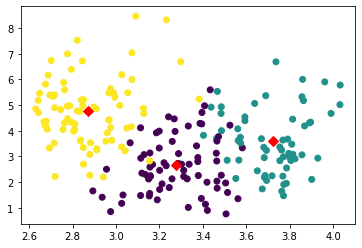

In [13]:
# WK vs A_Coeff
xs_A=seeds.iloc[:,4]
ys_LKG=seeds.iloc[:,5]
centroids_xs_A=centroids[:,4]
centroids_ys_LKG=centroids[:,5]
plt.scatter(xs_A,ys_LKG,c=seed_labels)
plt.scatter(centroids_xs_A,centroids_ys_LKG,marker='D',s=50,c='red')
plt.show()

**Tranforming Features for Better Clustering**

In [14]:
wine=pd.read_csv('/content/drive/MyDrive/D3.js Visualization/wine.csv',header=None)
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [15]:
wine.columns=['Class','Alcohol','Malic_acid','Ash','Alcalinity_of_ash','Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins','Color_intensity','Hue','OD280','Proline']          

In [16]:
wine.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [17]:
wine_class=wine['Class']
wine.drop('Class',axis=1,inplace=True)

In [18]:
model=KMeans(n_clusters=3)
labels=model.fit_predict(wine)

df=pd.DataFrame({'labels':labels , 'class':wine_class})
ct=pd.crosstab(df['labels'],df['class'])
ct

class,1,2,3
labels,,,
0,13,20,29
1,46,1,0
2,0,50,19


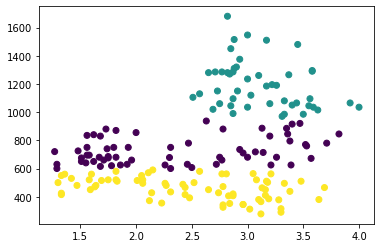

In [19]:
xs=wine.loc[:,'OD280']
ys=wine.loc[:,'Proline']
plt.scatter(xs,ys,c=labels)

In [20]:
wine.var(axis=0)

Alcohol                     0.659062
Malic_acid                  1.248015
Ash                         0.075265
Alcalinity_of_ash          11.152686
Magnesium                 203.989335
Total_phenols               0.391690
Flavanoids                  0.997719
Nonflavanoid_phenols        0.015489
Proanthocyanins             0.327595
Color_intensity             5.374449
Hue                         0.052245
OD280                       0.504086
Proline                 99166.717355
dtype: float64

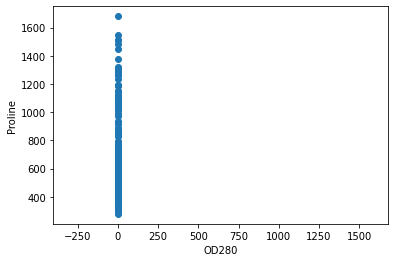

In [21]:
# Variance comparison between Proline and OD280
plt.scatter(wine['OD280'],wine['Proline'])
plt.xlim(-400,max(wine['Proline']))
plt.xlabel('OD280')
plt.ylabel('Proline')
plt.show()

**Applying Standard Scaler (then KMeans in sklearn Pipeline)**

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scaler=StandardScaler()
kmeans=KMeans(n_clusters=3)
pipeline=make_pipeline(scaler,kmeans)
pipeline.fit(wine)
labels=pipeline.predict(wine)


In [23]:
df=pd.DataFrame({'labels':labels,'class':wine_class   }) 
ct=pd.crosstab(df['labels'],df['class'])
ct
# After scaling we get tight clusters

class,1,2,3
labels,,,
0,0,3,48
1,59,3,0
2,0,65,0


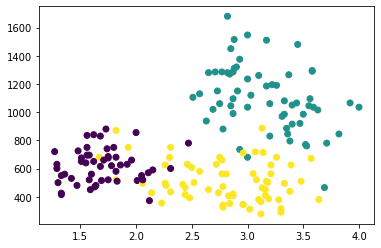

In [24]:
xs=wine.loc[:,'OD280']
ys=wine.loc[:,'Proline']
plt.scatter(xs,ys,c=labels)

**Scaling without pipeline**

In [25]:
scaled_wine=scaler.fit_transform(wine)
scaled_wine.var(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [26]:
scaled_wine=pd.DataFrame(scaled_wine)
scaled_wine.columns=['Alcohol','Malic_acid','Ash','Alcalinity_of_ash','Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins','Color_intensity','Hue','OD280','Proline']          

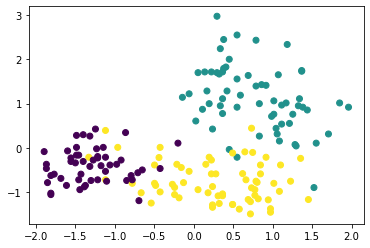

In [27]:
lables=KMeans(n_clusters=3).fit_predict(scaled_wine)
xs=scaled_wine.loc[:,'OD280']
ys=scaled_wine.loc[:,'Proline']
plt.scatter(xs,ys,c=labels)


**Visualization with hierarchical clustering and t-SNE**

In [28]:
from scipy.cluster.hierarchy import linkage,dendrogram , fcluster


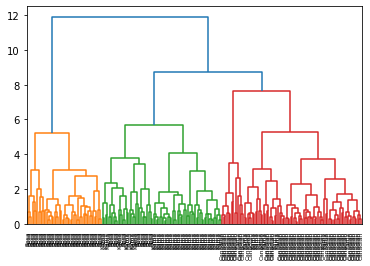

In [29]:
mergings=linkage(seeds,method='complete')
#plt.figure(figsize=(50,50))
dendrogram(mergings,labels=seed_list,leaf_rotation=90,leaf_font_size=6)
plt.show()



In [30]:
labels=fcluster(mergings,6,criterion='distance')
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 4 2 2 2 4 2 2 4 4 2 2 4 2 2 2 2 2 2
 2 2 3 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 4 2 2 2 4 2 2 2 1
 2 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 2 1 1 2 2 2 2 2 2 2 2 4 3 3 4 4 3 4 4
 4 4 4 3 4 4 4 3 4 4 4 4 4 4 4 4 3 4 4 4 4 4 3 3 4 4 4 4 4 4 3 4 4 4 4 4 3
 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 3 4 4]


In [31]:
df=pd.DataFrame({'labels':labels,
             'seed_variety':seed_list})

ct=pd.crosstab(df['labels'],df['seed_variety'])
ct

seed_variety,Canadian,Kama,Rosa
labels,,,
1,0,0,47
2,0,52,23
3,13,1,0
4,57,17,0


In [32]:
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
iris=load_iris()
data=iris.data
species=iris.target

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


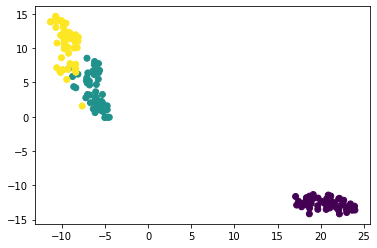

In [33]:
import seaborn as sns
model=TSNE(learning_rate=100)
transformed=model.fit_transform(data)
xs=transformed[:,0]
ys=transformed[:,1]
plt.scatter(xs,ys,c=species)
#plt.legend(species)
#sns.scatterplot(xs,ys,hue=species)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


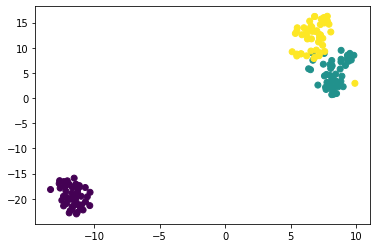

In [34]:
model=TSNE(learning_rate=100)
transformed=model.fit_transform(data)
xs=transformed[:,0]
ys=transformed[:,1]
plt.scatter(xs,ys,c=species)
#plt.legend(species)
#sns.scatterplot(xs,ys,hue=species)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


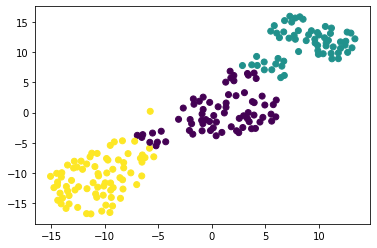

In [35]:
# TSNE on Seed Data

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(seeds)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=seed_labels)
plt.show()

# the t-SNE visualization manages to separate the 3 varieties of grain samples.
# Annotate the points
# for x, y, seedlabel in zip(xs, ys, seed_labels):
#     plt.annotate(seedlabel, (x, y), fontsize=5, alpha=0.75)
